# Project Title: Advanced Portfolio Performance Analysis

## Brief:
You have been tasked with analyzing and visualizing the performance of a portfolio of stocks over a specific period of time. The portfolio consists of five stocks: Apple Inc. (AAPL), Amazon.com Inc. (AMZN), Microsoft Corporation (MSFT), Google (Alphabet) Inc. (GOOGL), and Facebook, Inc. (FB). Your objective is to gain deeper insights into the portfolio's performance, evaluate risk factors, and assess the effectiveness of different investment strategies.

## Tasks:
#### 1. Data Acquisition:
   - Import the necessary libraries: yfinance, Pandas, Matplotlib, and Seaborn.
   - Use the yfinance library to fetch historical stock data for the five chosen stocks, covering a period of at least five years.

#### 2. Data Manipulation:
   - Perform data cleaning and preprocessing, handling missing values or outliers if any.
   - Combine the individual stock data into a single dataset, ensuring alignment of dates and stock prices.
   - Calculate daily returns for each stock and the portfolio.
   - Calculate cumulative returns for each stock and the portfolio.

#### 3. Data Analysis:
   - Compute descriptive statistics for the portfolio, including mean returns, standard deviation, and correlation between stocks.
   - Calculate the Sharpe ratio to assess the risk-adjusted returns of the portfolio.
   - Conduct a rolling analysis to evaluate the portfolio's performance over different time periods.
   - Perform a regression analysis to determine the sensitivity of the portfolio to market movements (beta).

#### 4. Data Visualization:
   - Create line plots to visualize the daily and cumulative returns of each stock and the portfolio over time.
   - Generate bar plots or pie charts to show the composition of the portfolio in terms of the percentage allocation to each stock.
   - Utilize Seaborn to create heatmaps or scatter plots to analyze the correlation between stocks.

## (Financial Indicators to Calculate and Analyze:)
#### 1. Daily Returns and Cumulative Returns:
   - Calculate and analyze the daily and cumulative returns of each stock and the portfolio.
   - Identify periods of outperformance or underperformance.

#### 2. Risk Metrics:
   - Calculate the standard deviation and variance of the portfolio's returns.
   - Determine the Value at Risk (VaR) and Conditional Value at Risk (CVaR) to assess downside risk.

#### 3. Correlation and Diversification:
   - Calculate the correlation matrix of the portfolio's stocks.
   - Evaluate the benefits of diversification by assessing the portfolio's correlation with the benchmark index and individual stocks.

#### 4. Sharpe Ratio and Risk-Adjusted Performance:
   - Calculate the Sharpe ratio for the portfolio to assess risk-adjusted returns.
   - Compare the portfolio's Sharpe ratio to different benchmark indexes or other portfolios.

#### 5. Beta and Regression Analysis:
   - Conduct a regression analysis to determine the sensitivity (beta) of the portfolio to market movements.
   - Assess the portfolio's systematic risk and compare it to the market.

## Submission:
You are required to submit a comprehensive report in the form of a Jupyter Notebook, documenting your data manipulation, analysis, and visualization steps. The report should include clear explanations, well-annotated code snippets, and visualizations to support your findings. Additionally, provide a concise

<font color="red">Adjustments:
- I will allow the user to input multiple ticker symbols of their own choosing to make it more personalised
- User can input their capital value to invest, to create a specified portfolio outcome
- Use a bootstrap method as well as regression and compare results [time and accuracy]

### 1) Import necessary libraries:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm

### 2) Receive and validate users desired ticker symbols:

In [6]:
asset_input = input('Select company ticker symbols: ')
ticker_symbols = asset_input.split(' ')
num_assets_given = len(ticker_symbols)

### 3) Import 5yr data ending 31-12-2014 (Analysis Period) and then 5yr ending 31-12-2019 (Performance Period)

In [7]:
def get_ticker_data(ticker_string, start_date, end_date):
    temp_df = yf.download(ticker_string, start=start_date, end=end_date, interval='1d')
    temp_df['Volume'] = temp_df['Volume'].div(1000000)  # Scale Volume Column down
    price_data = temp_df['Close']         # Remove unneeded data
    vol_data = temp_df['Volume']
    return price_data, vol_data

analysis_price_data, analysis_vol_data = get_ticker_data(asset_input, start_date="2009-12-31", end_date="2014-12-31")
perf_price_data, perf_vol_data = get_ticker_data(asset_input, start_date="2014-12-31", end_date="2019-12-31")

analysis_mrkt_price_data, analysis_mrkt_vol_data = get_ticker_data('^GSPC', start_date="2009-12-31", end_date="2014-12-31")
perf_mrkt_price_data, perf_mrkt_vol_data = get_ticker_data('^GSPC', start_date="2014-12-31", end_date="2019-12-31")

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 4) From Price Data, display the absolute and normalised prices during analysis period

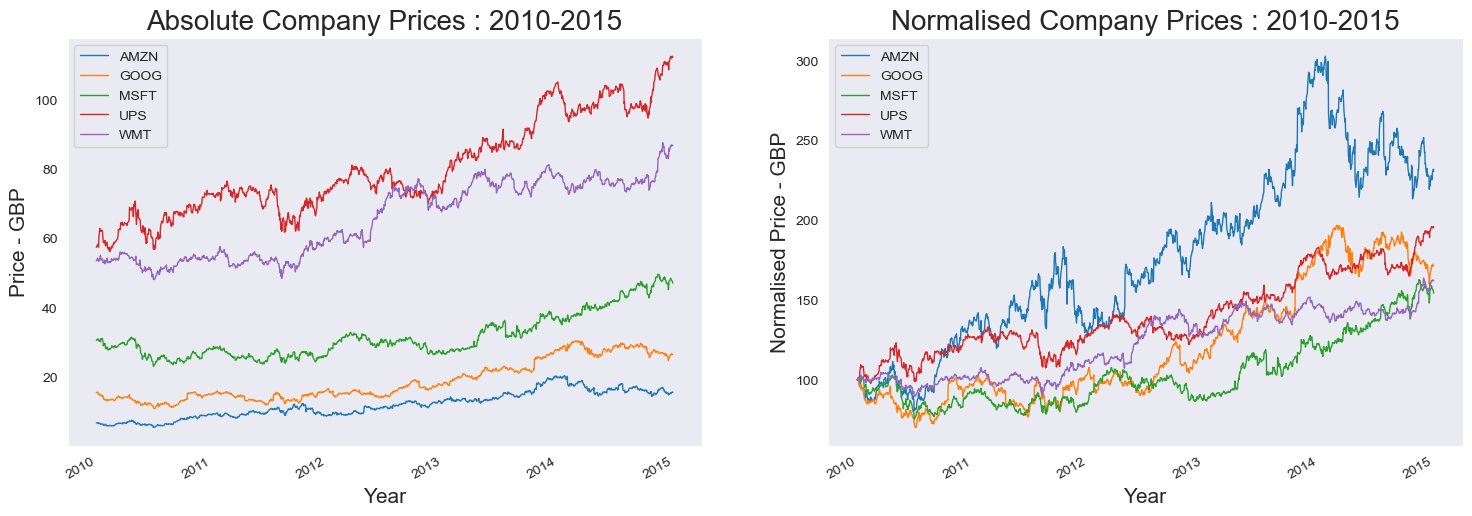

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

# Display the Price Movement of Stocks over 5 years
analysis_price_data.plot(subplots=False, linewidth=1, ax=ax1)
ax1.set_title('Absolute Company Prices : 2010-2015', fontsize=20)
ax1.legend(fontsize=10)
ax1.set_xlabel('Year', fontsize=15)
ax1.set_ylabel('Price - GBP', fontsize=15)
ax1.grid()

# Calculate and Display the Normalised Price Movement of Stocks over 5 years
norm_price_data = analysis_price_data.fillna(1).div(analysis_price_data.fillna(1).iloc[0]).mul(100)
norm_price_data.plot(linewidth=1, ax=ax2)
ax2.set_title('Normalised Company Prices : 2010-2015', fontsize=20)
ax2.legend(fontsize=10)
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Normalised Price - GBP', fontsize=15)
ax2.grid()
plt.show()

### 5) Calculate individual stock data (Std Dev, Mean [Arithmetic and Geometric], Sharpe, Beta, Correlations)

In [22]:
risk_free_rate = 2.5

analysis_return_data = analysis_price_data.pct_change(periods=1).mul(100)   # Create the % change in price each day

company_stats = analysis_return_data.agg(['mean', 'std']).T
company_stats.columns = ['Return', 'Risk']
company_stats.Return = company_stats.Return * 252  # Annual Return
company_stats.Risk = company_stats.Risk * np.sqrt(252)
company_stats['Sharpe'] = (company_stats.Return - risk_free_rate).div(company_stats.Risk)

# Geometric Means:
num_periods = 5
geo_means = []
for company in norm_price_data.columns.to_list():
    product = norm_price_data.loc['2014-12-30', company] / 100
    geo_mean = ((product ** (1/num_periods)) - 1) * 100
    geo_means.append('{:.2f}%'.format(geo_mean))
company_stats['Geo. Mean'] = geo_means
print(company_stats)

         Return       Risk    Sharpe Geo. Mean
AMZN  22.087685  32.628198  0.600330    18.19%
GOOG  13.870186  24.903854  0.456563    11.36%
MSFT  11.150735  22.159544  0.390384     9.06%
UPS   15.043357  17.923157  0.699841    14.34%
WMT   10.791451  14.636978  0.566473    10.18%


### 6) Find Correlation Matrix between Companies and Market

In [23]:
market_returns = analysis_mrkt_price_data.pct_change(periods=1).mul(100).to_frame()
market_returns.columns = ['Market']

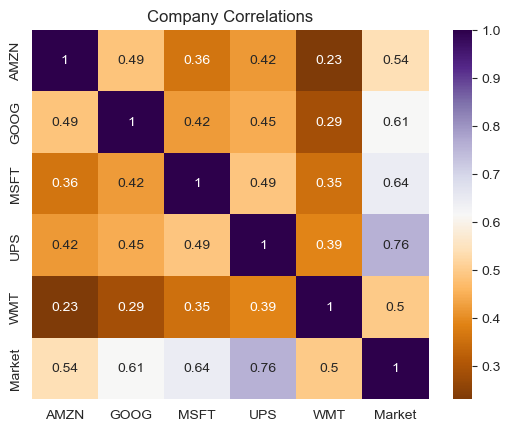

In [24]:
company_correls = pd.concat((analysis_return_data, market_returns), axis=1).corr()
market_stats = market_returns.agg(['mean', 'std']).T
market_stats.columns = ['Return', 'Risk']
market_stats.Return = market_stats.Return * 252
market_stats.Risk = market_stats.Risk * np.sqrt(252)

sns.heatmap(company_correls, annot=True, cmap='PuOr')
plt.title('Company Correlations')
plt.show()

### 7) Calculate Company Betas

In [26]:
def get_company_betas(company_returns, market_returns):
    betas = []
    for ticker in company_returns.columns:
        model = sm.OLS(company_returns[ticker], market_returns).fit()
        beta = model.params['Close']
        betas.append(beta)
    return betas

mkt_norm_price_data = analysis_mrkt_price_data.fillna(1).div(analysis_mrkt_price_data.fillna(1).iloc[0]).mul(100)
company_stats['Beta'] = get_company_betas(norm_price_data, mkt_norm_price_data)
print(company_stats)

         Return       Risk    Sharpe Geo. Mean      Beta
AMZN  22.087685  32.628198  0.600330    18.19%  1.359654
GOOG  13.870186  24.903854  0.456563    11.36%  0.934952
MSFT  11.150735  22.159544  0.390384     9.06%  0.782831
UPS   15.043357  17.923157  0.699841    14.34%  1.051206
WMT   10.791451  14.636978  0.566473    10.18%  0.918122


### 8) Bootstrap Portfolio Analysis! [W/ Random Portfolio Weights]

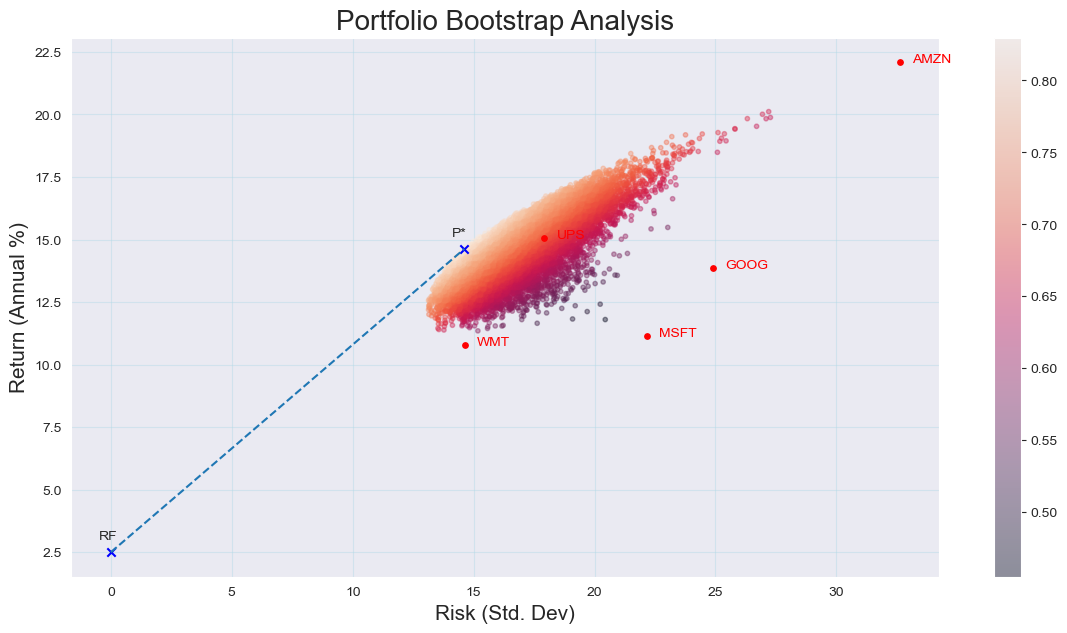

In [29]:
def set_rand_port_weights(num_ports=20000, num_assets=None):
    np.random.seed(123)
    temp_p_weights = np.random.random(num_assets * num_ports).reshape(num_ports, num_assets)
    # Divide by sum of rows so each row sums to 1
    scaled_port_weights = temp_p_weights / temp_p_weights.sum(axis=1, keepdims=True)
    return scaled_port_weights

def annual_risk_return(daily_returns):
    stats = daily_returns.agg(['mean', 'std']).T
    stats.columns = ['Return', 'Risk']
    stats.Return = stats.Return * 252  # 252 Business days per year
    stats.Risk = stats.Risk * np.sqrt(252)  # As Risk is sqrt of variance
    return stats

rand_port_weights = set_rand_port_weights(num_assets=num_assets_given)
port_return_data = annual_risk_return(analysis_return_data.dot(rand_port_weights.T))
port_return_data['Sharpe'] = (port_return_data.Return - risk_free_rate) / port_return_data.Risk

max_sharpe_index = port_return_data.Sharpe.idxmax()
opt_weights = rand_port_weights[max_sharpe_index, :]
opt_stats = port_return_data.iloc[max_sharpe_index]

# Display Portfolio Results against Companies
plt.figure(figsize=(14,7))
plt.grid(color='lightblue', alpha=0.4)
plt.xlabel('Risk (Std. Dev)', fontsize=15)
plt.ylabel('Return (Annual %)', fontsize=15)
plt.title('Portfolio Bootstrap Analysis', fontsize=20)
plt.scatter(port_return_data.loc[:, 'Risk'], port_return_data.loc[:, 'Return'], c=port_return_data.loc[:, 'Sharpe'], s=10, alpha=0.4)
plt.colorbar()
plt.scatter(company_stats.loc[:, 'Risk'], company_stats.loc[:, 'Return'], color='r', s=15)
for i in company_stats.index:
    plt.annotate(i, xy=(company_stats.loc[i, 'Risk'] + 0.5, company_stats.loc[i, 'Return']), color='r')
# Risk Free Point:
plt.scatter(x=0, y=risk_free_rate, marker='x', color='blue')
plt.annotate('RF', xy=(-0.5, risk_free_rate+0.5))
# Max Sharpe Portfolio
plt.scatter(opt_stats.Risk, opt_stats.Return, marker='x', color='blue')
plt.annotate('P*', xy=(opt_stats.Risk - 0.5, opt_stats.Return + 0.5))
plt.plot([0, opt_stats.Risk], [risk_free_rate, opt_stats.Return], linestyle='dashed')
plt.show()

### 9) Locate max Sharpe weights and note the results

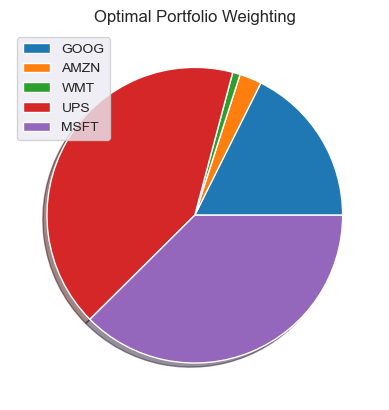

Optimal Risk/Return/Sharpe: 14.62, 14.63%, 0.830
[0.17626161 0.02419373 0.00822548 0.41574425 0.37557493]


In [34]:
plt.pie(opt_weights, shadow=True)
plt.legend(ticker_symbols)
plt.title('Optimal Portfolio Weighting')
plt.show()

print('Optimal Risk/Return/Sharpe: {:.2f}, {:.2f}%, {:.3f}'.format(opt_stats.Risk, opt_stats.Return, port_return_data.Sharpe[max_sharpe_index]))
print(opt_weights)

### 10) Bootstrap Portfolio Analysis [W/ Constrained Portfolio Weights]

In [35]:
def set_constrained_ws(num_ports=20000, num_assets=None):
    np.random.seed(123)
    # Tested lower and upper limit manually
    # 0.1 and 0.35 create min=0.0714 and max=0.4299 over 20000 ports
    temp_p_weights = np.random.uniform(0.1, 0.35, size=(num_assets * num_ports)).reshape(num_ports, num_assets)
    # Divide by sum of rows so each row sums to 1
    scaled_port_weights = temp_p_weights / temp_p_weights.sum(axis=1, keepdims=True)
    return scaled_port_weights

constrained_ws = set_constrained_ws(num_assets=num_assets_given)
constrained_ws_data = annual_risk_return(analysis_return_data.dot(constrained_ws.T))
constrained_ws_data['Sharpe'] = (constrained_ws_data.Return - risk_free_rate) / constrained_ws_data.Risk

constrained_max_sharpe_index = constrained_ws_data.Sharpe.idxmax()
constrained_opt_weights = constrained_ws[constrained_max_sharpe_index, :]
constrained_opt_stats = constrained_ws_data.iloc[constrained_max_sharpe_index]

### 11) Compare Unconstrained and Constrained Weightings

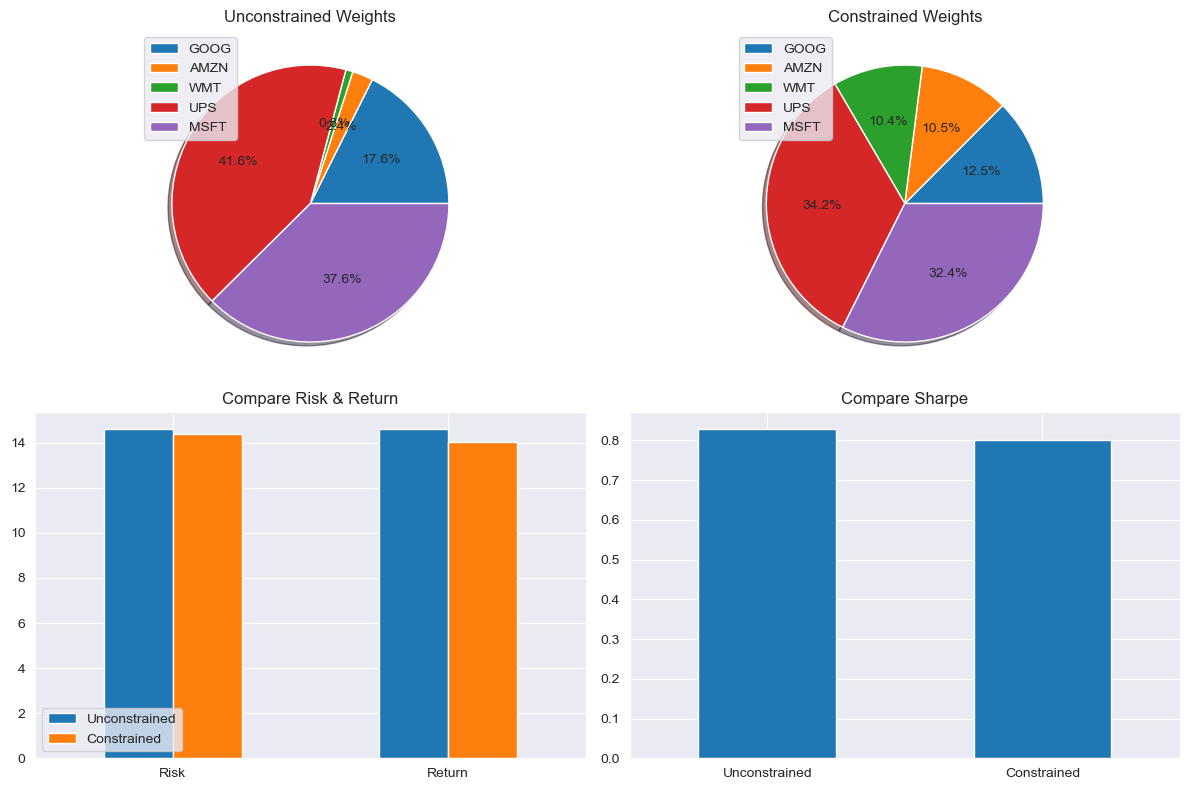

*** UNCONSTRAINED ***
[0.17626161 0.02419373 0.00822548 0.41574425 0.37557493] 

*** CONSTRAINED ***
[0.1251808  0.10471509 0.10434104 0.34175321 0.32400986] 

        Unconstrained  Constrained
Return      14.627690    14.018503
Risk        14.616463    14.367818
Sharpe       0.829728     0.801688


In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,8))

# Pie Chart for Unconstrained Weights
ax1.pie(opt_weights, autopct='%1.1f%%', shadow=True)
ax1.legend(ticker_symbols, loc='upper left')
ax1.set_title('Unconstrained Weights')

# Pie Chart for Constrained Weights
ax2.pie(constrained_opt_weights, autopct='%1.1f%%', shadow=True)
ax2.legend(ticker_symbols, loc='upper left')
ax2.set_title('Constrained Weights')

# Table to compare Unconstrained and Constrained Stats
t_uncon_vs_con = pd.concat([opt_stats, constrained_opt_stats], axis=1)
t_uncon_vs_con.columns = ['Unconstrained', 'Constrained']

# Barchart for Risk and Return
t_uncon_vs_con.loc[['Risk','Return']].plot(kind='bar', rot=0, ax=ax3)
ax3.legend(loc='lower left')
ax3.set_title('Compare Risk & Return')

# Barchart for Sharpe
t_uncon_vs_con.loc['Sharpe'].plot(kind='bar', rot=0, ax=ax4)
ax4.set_title('Compare Sharpe')

plt.tight_layout()
plt.show()

print('*** UNCONSTRAINED ***')
print(opt_weights, '\n')

print('*** CONSTRAINED ***')
print(constrained_opt_weights, '\n')

print(t_uncon_vs_con)

### 12) Calculate Portfolio Performance   [Constrained, Unconstrained, Even-weight, Market]

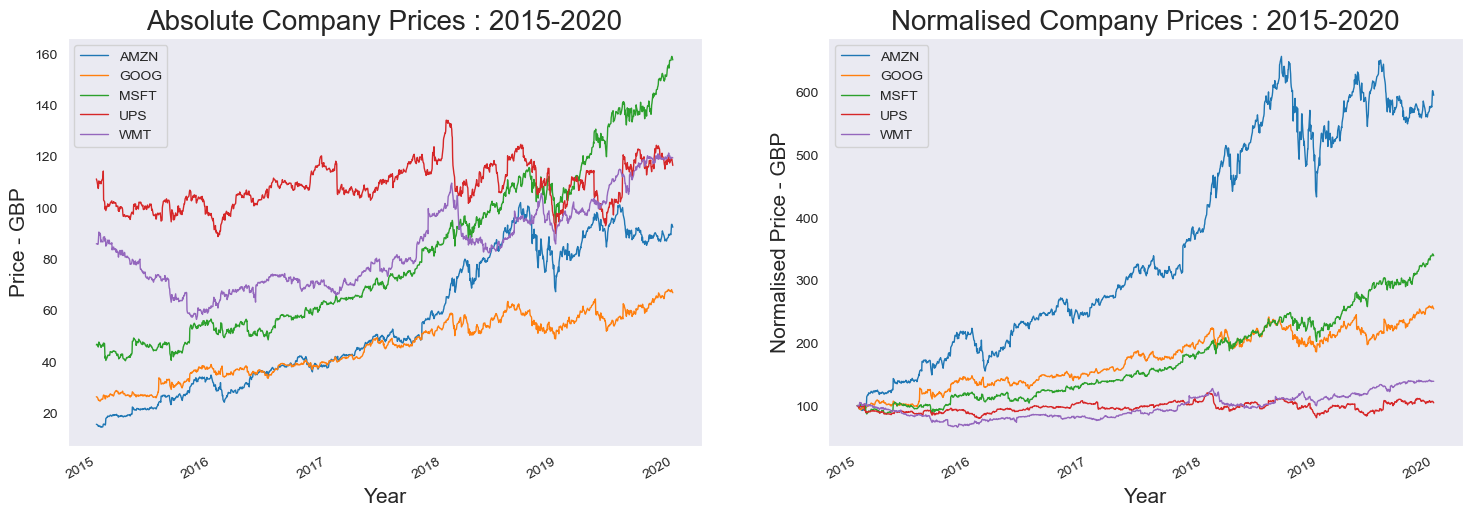

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

# Display the Price Movement of Stocks over 5 years
perf_price_data.plot(subplots=False, linewidth=1, ax=ax1)
ax1.set_title('Absolute Company Prices : 2015-2020', fontsize=20)
ax1.legend(fontsize=10)
ax1.set_xlabel('Year', fontsize=15)
ax1.set_ylabel('Price - GBP', fontsize=15)
ax1.grid()

# Calculate and Display the Normalised Price Movement of Stocks over 5 years
norm_perf_price_data = perf_price_data.fillna(1).div(perf_price_data.fillna(1).iloc[0]).mul(100)
norm_perf_price_data.plot(linewidth=1, ax=ax2)
ax2.set_title('Normalised Company Prices : 2015-2020', fontsize=20)
ax2.legend(fontsize=10)
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Normalised Price - GBP', fontsize=15)
ax2.grid()
plt.show()

### 13) Display portfolio performance from normalised values compared to S&P500 or another proxy

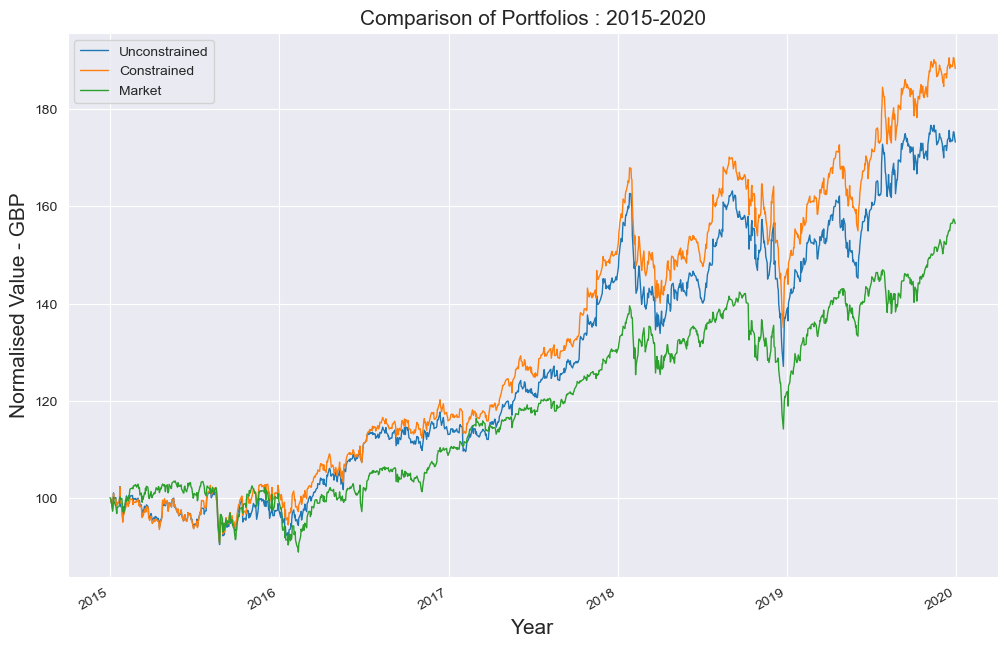

In [85]:
perf_return_data = perf_price_data.pct_change(periods=1).mul(100)

# Unconstrained Portfolio Returns and Values
uncon_port_return_data = perf_return_data.dot(opt_weights.T)
uncon_port_price_data = uncon_port_return_data.div(100).add(1).cumprod().mul(100)

# Constrained Portfolio Returns and Values
con_port_return_data = perf_return_data.dot(constrained_opt_weights.T)
con_port_price_data = con_port_return_data.div(100).add(1).cumprod().mul(100)

# Market Performance
norm_perf_mrkt_price_data = perf_mrkt_price_data.fillna(1).div(perf_mrkt_price_data.fillna(1).iloc[0]).mul(100)

ports_data = pd.concat([uncon_port_price_data, con_port_price_data, norm_perf_mrkt_price_data], axis=1)
ports_data.plot(figsize=(12,8), linewidth=1)
plt.legend(['Unconstrained', 'Constrained', 'Market'])
plt.title('Comparison of Portfolios : 2015-2020', size=15)
plt.xlabel('Year', size=15)
plt.ylabel('Normalised Value - GBP', size=15)
plt.show()